In [1]:
#Using Neural Networks to predict the values generated from a cubic expression
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cubic_data = pd.read_csv('/Users/chiragbhattad/Downloads/DDP/Cubic equation/dataset_cubic.csv')
features = ['x', 'b']
target = ['y']

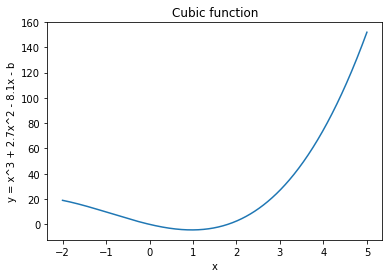

In [3]:
cubic_features = cubic_data[features]
cubic_target = cubic_data[target]
plt.plot(cubic_features['x'], cubic_target)
plt.title('Cubic function')
plt.ylabel('y = x^3 + 2.7x^2 - 8.1x - b')
plt.xlabel('x')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cubic_features, cubic_target, test_size = 0.2)

In [5]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

In [6]:
#The function takes the test data, dimensions of the test data and the number of neurons in the hidden layer as arguments.
def neural_network(X_data, input_dim, hidden_neurons):
    W_1 = tf.Variable(tf.random_uniform([input_dim,hidden_neurons]))
    b_1 = tf.Variable(tf.zeros([hidden_neurons]))
    layer_1 = tf.add(tf.matmul(X_data, W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    W_2 = tf.Variable(tf.random_uniform([hidden_neurons,hidden_neurons]))
    b_2 = tf.Variable(tf.zeros([hidden_neurons]))
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    
    W_0 = tf.Variable(tf.random_uniform([hidden_neurons,1]))
    b_0 = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2, W_0), b_0)
    
    return output

In [7]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")

output = neural_network(xs, 2, 15)
#Apart from the LSE cost function, Cross Entropy cost
cost = tf.reduce_mean(tf.square(output-ys))
train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

In [8]:
c_t = []
c_test = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for i in range(100):
        for j in range(X_train.shape[0]):
            sess.run([cost,train], feed_dict = {xs:X_train[j,:].reshape(1,2), ys:y_train[j]})
        c_t.append(sess.run(cost, feed_dict={xs:X_train, ys: y_train}))
        c_test.append(sess.run(cost, feed_dict={xs: X_test, ys: y_test}))
        print('Epoch: ', i, 'Cost: ', c_t[i])
    
    pred = sess.run(output, feed_dict = {xs:X_test})
    print('Cost: ', sess.run(cost, feed_dict={xs: X_test, ys: y_test}))
    

Epoch:  0 Cost:  121.5344
Epoch:  1 Cost:  45.71054
Epoch:  2 Cost:  31.756033
Epoch:  3 Cost:  24.346949
Epoch:  4 Cost:  19.325125
Epoch:  5 Cost:  17.674091
Epoch:  6 Cost:  15.324351
Epoch:  7 Cost:  13.486543
Epoch:  8 Cost:  12.052739
Epoch:  9 Cost:  10.638086
Epoch:  10 Cost:  9.269256
Epoch:  11 Cost:  7.736668
Epoch:  12 Cost:  7.626524
Epoch:  13 Cost:  6.5817356
Epoch:  14 Cost:  6.534846
Epoch:  15 Cost:  5.938571
Epoch:  16 Cost:  5.9763165
Epoch:  17 Cost:  5.4259458
Epoch:  18 Cost:  4.4243155
Epoch:  19 Cost:  3.3868752
Epoch:  20 Cost:  3.379874
Epoch:  21 Cost:  2.9490902
Epoch:  22 Cost:  2.577624
Epoch:  23 Cost:  2.272653
Epoch:  24 Cost:  1.862084
Epoch:  25 Cost:  1.8197109
Epoch:  26 Cost:  1.5243918
Epoch:  27 Cost:  1.5821539
Epoch:  28 Cost:  1.6865939
Epoch:  29 Cost:  1.5544415
Epoch:  30 Cost:  1.4558991
Epoch:  31 Cost:  1.1349916
Epoch:  32 Cost:  1.1482956
Epoch:  33 Cost:  1.9350815
Epoch:  34 Cost:  1.6593341
Epoch:  35 Cost:  1.3228376
Epoch:  36 Co

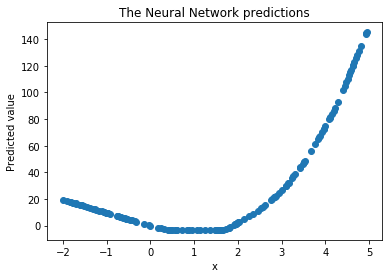

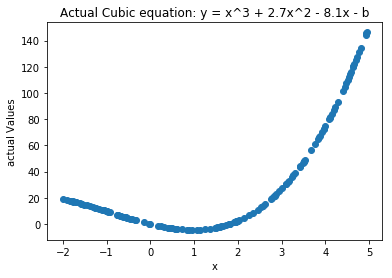

In [9]:
plt.scatter(X_test[:, 0], pred)
plt.ylabel("Predicted value")
plt.xlabel("x")
plt.title("The Neural Network predictions")
plt.show()
plt.scatter(X_test[:, 0], y_test)
plt.ylabel("actual Values")
plt.xlabel("x")
plt.title("Actual Cubic equation: y = x^3 + 2.7x^2 - 8.1x - b")
plt.show()